In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("telecom_churn - Sheet1 (1).csv")

In [3]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "")
df.columns = df.columns.str.lower()

print("Columns:", df.columns)
print("\nFirst 5 rows:")
print(df.head())

Columns: Index(['customer_id', 'gender', 'age', 'tenure_months', 'monthly_charges',
       'contract_type', 'internet_service', 'payment_method', 'churn'],
      dtype='str')

First 5 rows:
  customer_id  gender  age  tenure_months  monthly_charges   contract_type  \
0        C001    Male   25              6              500  Month-to-Month   
1        C002  Female   34             24              750        One Year   
2        C003    Male   45             36              820        Two Year   
3        C004  Female   29              3              600  Month-to-Month   
4        C005    Male   52             60              900        Two Year   

  internet_service    payment_method churn  
0      Fiber Optic       Credit Card   Yes  
1              DSL     Bank Transfer    No  
2      Fiber Optic       Credit Card    No  
3              DSL  Electronic Check   Yes  
4      Fiber Optic     Bank Transfer    No  


In [4]:
# 2️⃣ Overall Churn Rate
# -----------------------------
churn_rate = df["churn"].value_counts(normalize=True) * 100
print("\nOverall Churn Rate (%):")
print(churn_rate)


Overall Churn Rate (%):
churn
No     64.285714
Yes    35.714286
Name: proportion, dtype: float64


In [5]:
# 3️⃣ Churn by Contract Type
# -----------------------------
contract_churn = pd.crosstab(
    df["contract_type"],
    df["churn"],
    normalize="index"
) * 100
print("\nChurn by Contract Type (%):")
print(contract_churn)


Churn by Contract Type (%):
churn              No    Yes
contract_type               
Month-to-Month    0.0  100.0
One Year        100.0    0.0
Two Year        100.0    0.0


In [6]:
# 4️⃣ Tenure Analysis
# -----------------------------
tenure_analysis = df.groupby("churn")["tenure_months"].mean()
print("\nAverage Tenure by Churn:")
print(tenure_analysis)


Average Tenure by Churn:
churn
No     33.111111
Yes     4.000000
Name: tenure_months, dtype: float64


In [7]:
# 5️⃣ Monthly Charges Analysis
# -----------------------------
charges_analysis = df.groupby("churn")["monthly_charges"].mean()
print("\nAverage Monthly Charges by Churn:")
print(charges_analysis)


Average Monthly Charges by Churn:
churn
No     786.666667
Yes    538.000000
Name: monthly_charges, dtype: float64


In [8]:
# 6️⃣ Churn by Internet Service
# -----------------------------
internet_churn = pd.crosstab(
    df["internet_service"],
    df["churn"],
    normalize="index"
) * 100

print("\nChurn by Internet Service (%):")
print(internet_churn)


Churn by Internet Service (%):
churn                    No        Yes
internet_service                      
DSL               71.428571  28.571429
Fiber Optic       57.142857  42.857143


In [9]:
# 7️⃣ Churn by Payment Method
# -----------------------------
payment_churn = pd.crosstab(
    df["payment_method"],
    df["churn"],
    normalize="index"
) * 100

print("\nChurn by Payment Method (%):")
print(payment_churn)


Churn by Payment Method (%):
churn                     No         Yes
payment_method                          
Bank Transfer     100.000000    0.000000
Credit Card        66.666667   33.333333
Electronic Check    0.000000  100.000000


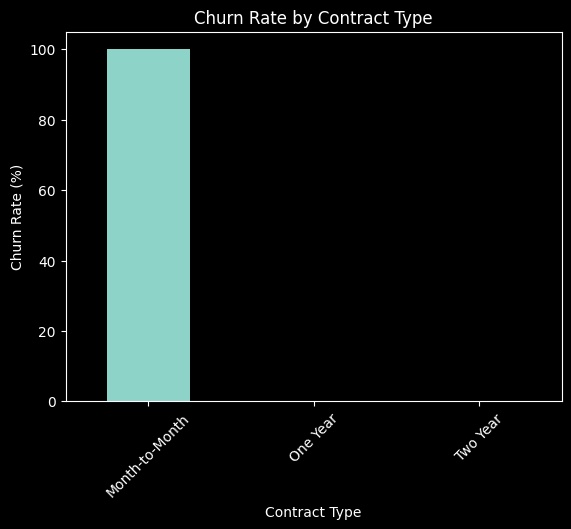

In [10]:
# Plot 1: Churn by Contract Type
plt.figure()
contract_churn["Yes"].plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.xticks(rotation=45)
plt.show()

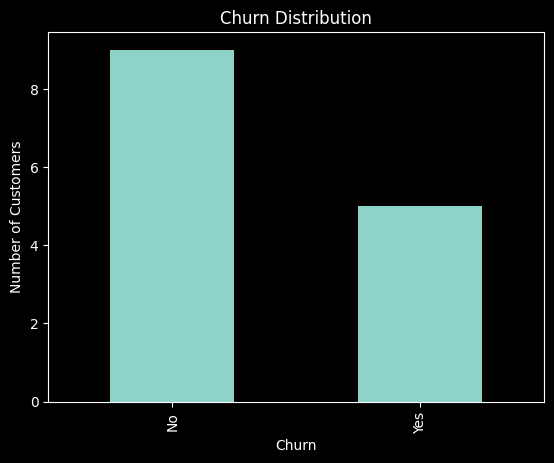

In [11]:
# Plot 2: Churn Distribution
plt.figure()
df["churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()